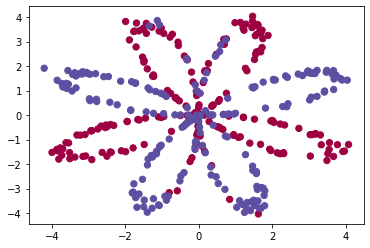

In [173]:
import matplotlib.pyplot as plt
import numpy as np

def get_dataset():
  np.random.seed(1)
  m = 400
  N = int(m / 2) # number of points per class
  
  dimension = 2
  X = np.zeros((m, dimension)) # data matrix where each row is a single example
  Y = np.zeros((m, 1), dtype='uint8') # labels vector (0 for red, 1 for blue)
  flower_ray = 4

  for j in range(2):
      indexs = range(N*j, N*(j+1))
      t = np.linspace(j*3.12, (j+1)*3.12, N) + np.random.randn(N)*0.2
      r = flower_ray * np.sin(4*t) + np.random.randn(N) * 0.2
      X[indexs] = np.c_[r*np.sin(t), r*np.cos(t)]
      Y[indexs] = j
      
  X = X.T
  Y = Y.T
  return X, Y

X, Y = get_dataset()
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

In [174]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [175]:
def sigmoid_derivative(x):
    return sigmoid(x)/(1-sigmoid(x))

In [176]:
def tanh(x):
    return np.tanh(x)

In [177]:
def tanh_derivative(x):
    return 1 - (tanh(x) ** 2)

In [178]:
def binary_cross_entropy(actual, predicted):
    sum_score = 0.0
    for i in range(len(actual)):
        sum_score += actual[0][i] * np.log(1e-15 + predicted[0][i])
        mean_sum_score = 1.0 / len(actual[0]) * sum_score
    return -mean_sum_score

In [209]:
class NeuralNetwork:
    def __init__(self, neuron_nums=(2, 4, 1)):
        self.input_neurons = neuron_nums[0]
        self.hiden_neurons = neuron_nums[1]
        self.output_neurons = neuron_nums[2]
        self.initialize_parameters()
    
    def initialize_parameters(self):
        self.W1 = np.random.randn(self.hiden_neurons, self.input_neurons) * 0.01
        self.b1 = np.zeros((self.hiden_neurons, 1))
        self.W2 = np.random.randn(self.output_neurons, self.hiden_neurons) * 0.01
        self.b2 = np.zeros((self.output_neurons, 1))
        
    def forward_propagation(self, X):
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = np.tanh(self.Z1)
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2
    
    
    def backward_propagation(self, X, Y):
        m = Y.shape[1]
        dZ2 = self.A2 - Y
        self.dW2 = (1 / m) * np.dot(dZ2, self.A1.T)
        self.db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
        
        dZ1 = np.dot(self.W2.T, dZ2) * tanh_derivative(self.Z1)
        self.dW1 = 1/m * np.dot(dZ1, X.T)
        self.db1 = 1/m * np.sum(dZ1, axis = 1, keepdims = True)
    
    def update_weights(self):
        self.W1 -= self.dW1
        self.W2 -= self.dW2
        
        self.b1 -= self.db1
        self.b2 -= self.db2

In [192]:
NN = NeuralNetwork()

In [193]:
def fit(model, X, Y, epochs):
    loss = []
    for _ in range(epochs):
        output = model.forward_propagation(X)
        loss.append(binary_cross_entropy(output, Y))
        model.backward_propagation(X, Y)
        model.update_weights()
    return loss

In [194]:
epochs = 5000
loss = fit(NN, X, Y, epochs)

In [195]:
def predict(model, X):
    return np.round(model.forward_propagation(X))

In [196]:
def test(model, X, Y):
    predictions = predict(model, X)
    FP, FN, TP, TN = [0] * 4
    for y_true, y_pred in zip(Y[0], predictions[0]):
        if y_true == y_pred:
            TP += 1
        elif y_true == 0 and y_pred == 1:
            FP += 1
        elif y_true == 1 and y_pred == 0:
            TN += 1
        else:
            FN += 1
    accuracy = (TP + TN) / (TP + FN + FP + FN)
    return accuracy

In [197]:
predictions = predict(NN, X)

In [201]:
def plot_decision_boundary(X, prediction_func):# Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.1
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    yhat = predict(NN, grid.T)
    zz = yhat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=Y[0], cmap=plt.cm.Spectral)

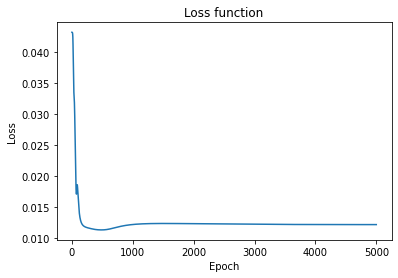

In [202]:
plt.plot(range(epochs), loss)
plt.title("Loss function")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

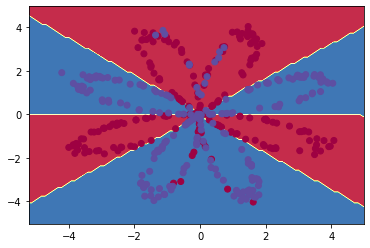

In [203]:
plot_decision_boundary(X, predict)

In [204]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [205]:
lr_auc = roc_auc_score(Y[0], predictions[0])

0.9025


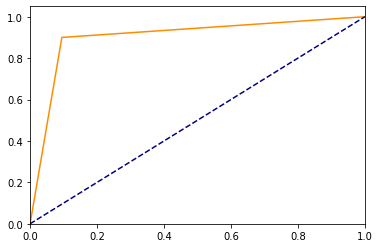

In [206]:
fpr, tpr, treshold = roc_curve(Y[0], predictions[0])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC (area = %0.2f)' % roc_auc)
print(roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

In [210]:
nn_to_test = [NeuralNetwork((2, i, 1)) for i in range(1, 10)]
epochs_num = [1000, 5000, 10000]
for hiden_neurons_num, nn in enumerate(nn_to_test, start=1):
    for epochs in epochs_num:
        fit(nn, X, Y, epochs)
        predictions = predict(nn, X)
        fpr, tpr, treshold = roc_curve(Y[0], predictions[0])
        roc_auc = auc(fpr, tpr)
        print("hiden neurons num:", hiden_neurons_num, "epochs num", epochs, "roc_auc score: %0.2f" % roc_auc )
        nn.initialize_parameters()

hiden neurons num: 1 epochs num 1000 roc_auc score: 0.68
hiden neurons num: 1 epochs num 5000 roc_auc score: 0.67
hiden neurons num: 1 epochs num 10000 roc_auc score: 0.68
hiden neurons num: 2 epochs num 1000 roc_auc score: 0.65
hiden neurons num: 2 epochs num 5000 roc_auc score: 0.67
hiden neurons num: 2 epochs num 10000 roc_auc score: 0.67
hiden neurons num: 3 epochs num 1000 roc_auc score: 0.90
hiden neurons num: 3 epochs num 5000 roc_auc score: 0.91
hiden neurons num: 3 epochs num 10000 roc_auc score: 0.91
hiden neurons num: 4 epochs num 1000 roc_auc score: 0.88
hiden neurons num: 4 epochs num 5000 roc_auc score: 0.91
hiden neurons num: 4 epochs num 10000 roc_auc score: 0.92
hiden neurons num: 5 epochs num 1000 roc_auc score: 0.88
hiden neurons num: 5 epochs num 5000 roc_auc score: 0.90
hiden neurons num: 5 epochs num 10000 roc_auc score: 0.91
hiden neurons num: 6 epochs num 1000 roc_auc score: 0.89
hiden neurons num: 6 epochs num 5000 roc_auc score: 0.90
hiden neurons num: 6 epoch